First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

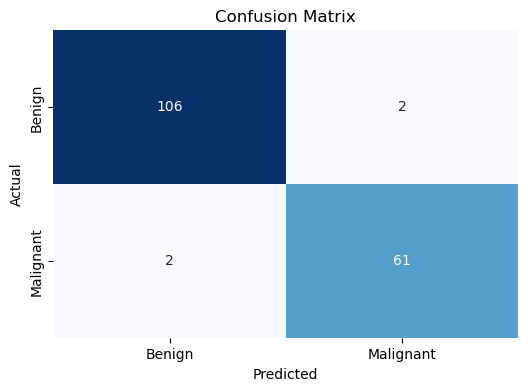

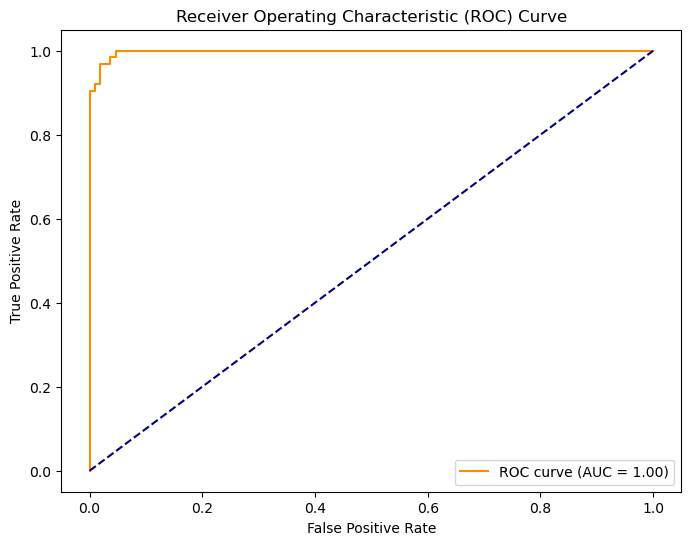

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Display first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(data.head())

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop 'id' and 'Unnamed: 32' as they are irrelevant

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=10000)  # Setting max_iter to handle convergence issues
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

# Visualization of Results

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

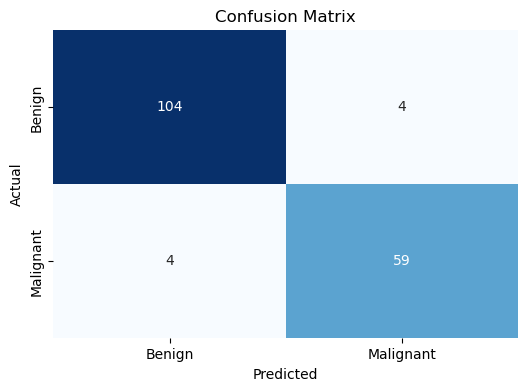

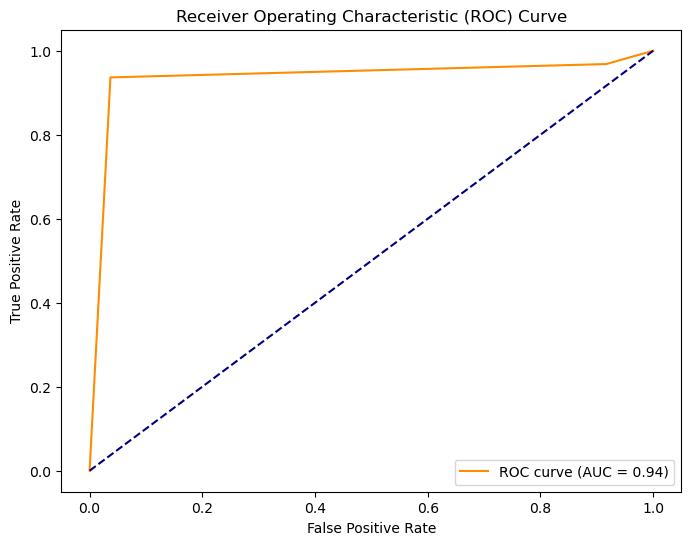

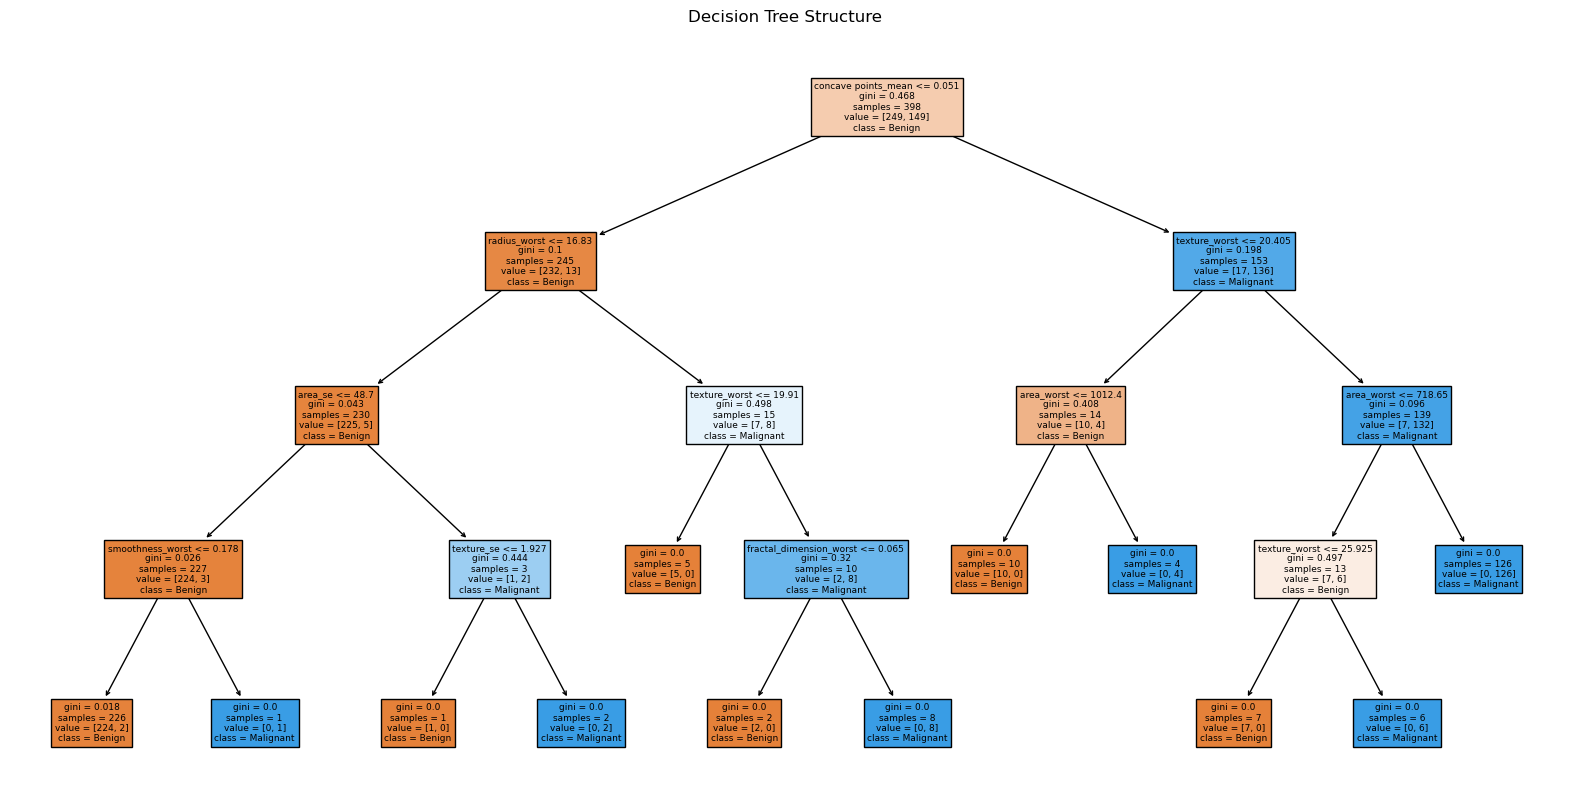

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Display first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(data.head())

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop 'id' and 'Unnamed: 32' as they are irrelevant

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Setting max_depth to control complexity
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

# Visualization of Results

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True)
plt.title("Decision Tree Structure")
plt.show()

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

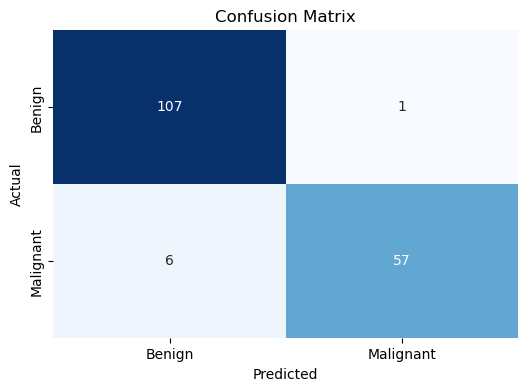

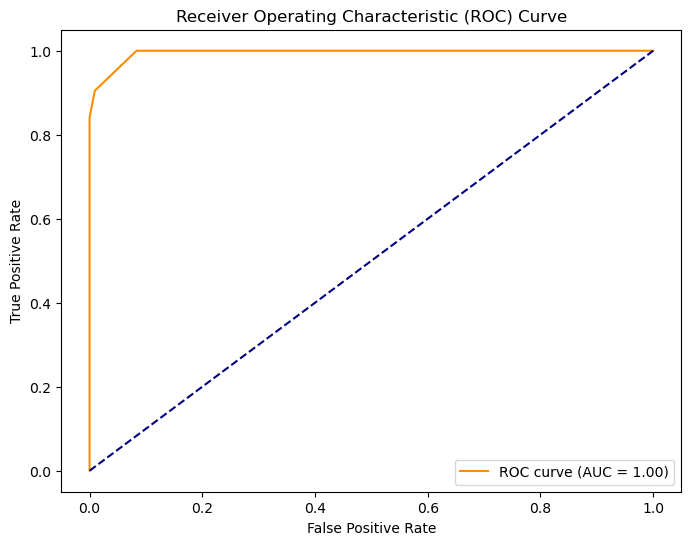

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Display first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(data.head())

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop 'id' and 'Unnamed: 32' as they are irrelevant

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the k-NN model
k = 5  # Choose k value
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

# Visualization of Results

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
pip install pandas numpy seaborn matplotlib scikit-learn shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ---------- ----------------------------- 122.9/456.2 kB 3.6 MB/s eta 0:00:01
   ------------- -------------------------- 153.6/456.2 kB 3.1 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.2 kB 2.5 MB/s eta 0:00:01
   ------------------------------------- -- 430.1/456.2 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

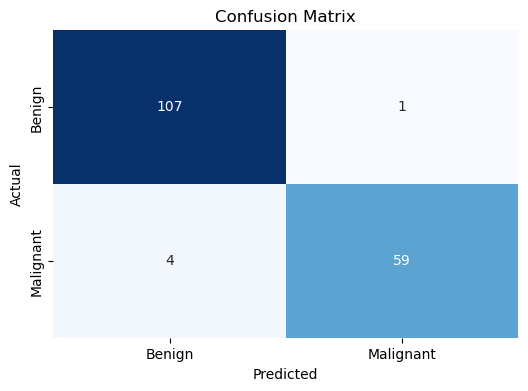

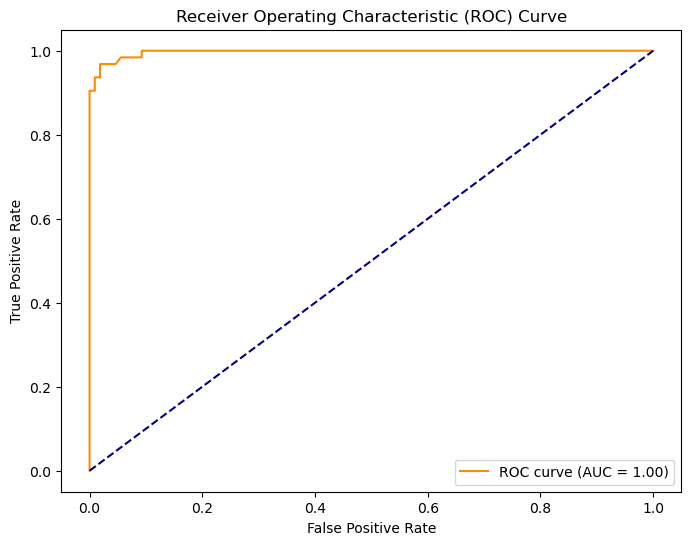

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1000x600 with 0 Axes>

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Display first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(data.head())

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop 'id' and 'Unnamed: 32' as they are irrelevant

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

# Visualization of Results

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Analysis using SHAP
explainer = shap.TreeExplainer(model)  # Create a SHAP explainer for the Random Forest model
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values

# Summary Plot of SHAP Values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)  # Use SHAP values for malignant class
plt.title('SHAP Summary Plot')
plt.show()

# SHAP Dependence Plot for the most important feature
shap.dependence_plot(0, shap_values[1], X_test, feature_names=X.columns)  # Plot for the first feature
plt.title('SHAP Dependence Plot for Feature 1')
plt.show()

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

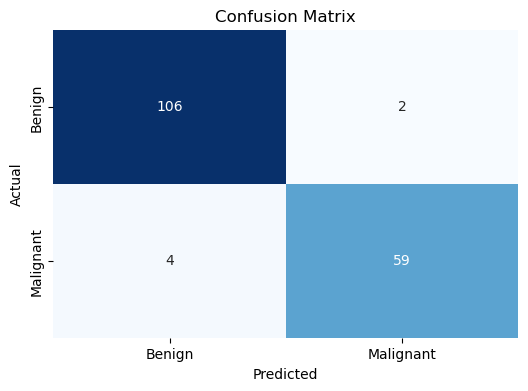

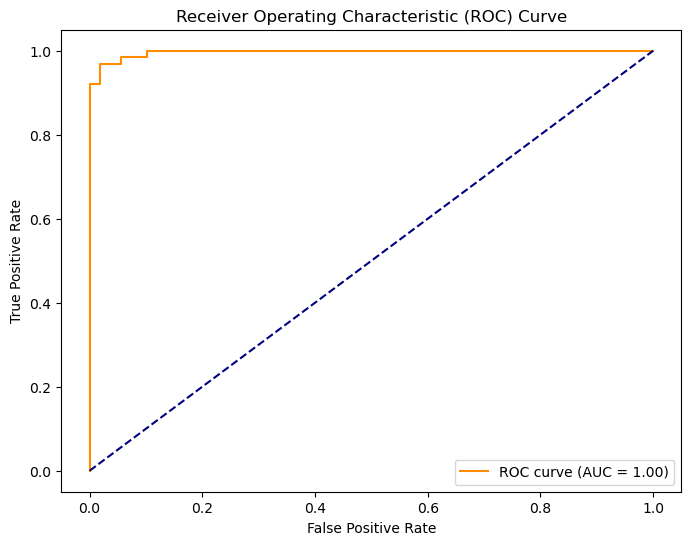

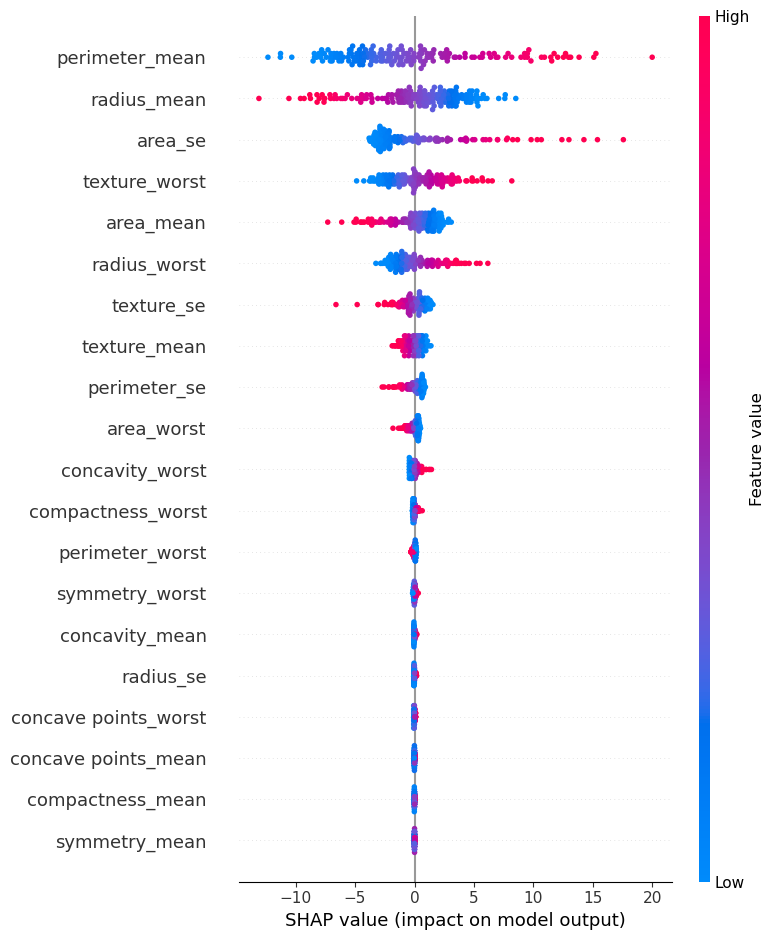

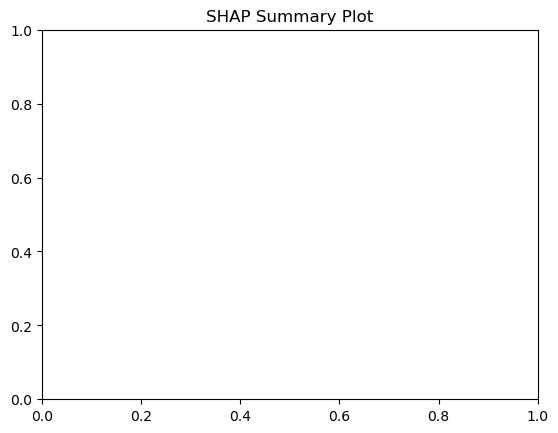

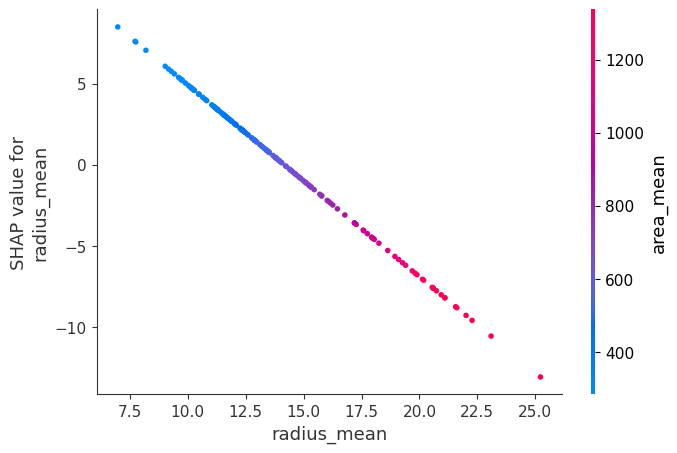

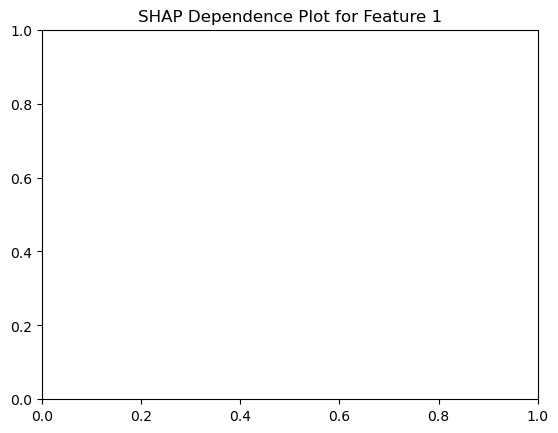

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Display first few rows to understand the dataset structure
print("First few rows of the dataset:")
print(data.head())

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop 'id' and 'Unnamed: 32' as they are irrelevant

# Encode the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM model with a linear kernel
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Model Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("ROC AUC Score:", roc_auc)

# Visualization of Results

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance Analysis using SHAP
explainer = shap.LinearExplainer(model, X_train)  # Create a SHAP explainer for the SVM model
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values

# Summary Plot of SHAP Values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=X.columns)  # Use SHAP values
plt.title('SHAP Summary Plot')
plt.show()

# SHAP Dependence Plot for the most important feature
shap.dependence_plot(0, shap_values, X_test, feature_names=X.columns)  # Plot for the first feature
plt.title('SHAP Dependence Plot for Feature 1')
plt.show()

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn interpret


Model Performance Metrics:
Accuracy: 0.9766
F1 Score: 0.9677
Precision: 0.9836
Recall: 0.9524
ROC AUC: 0.9966


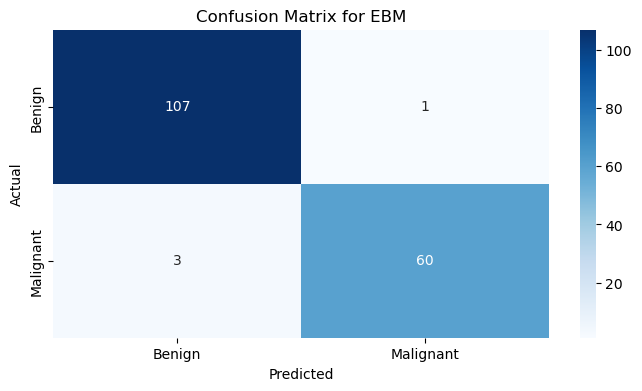

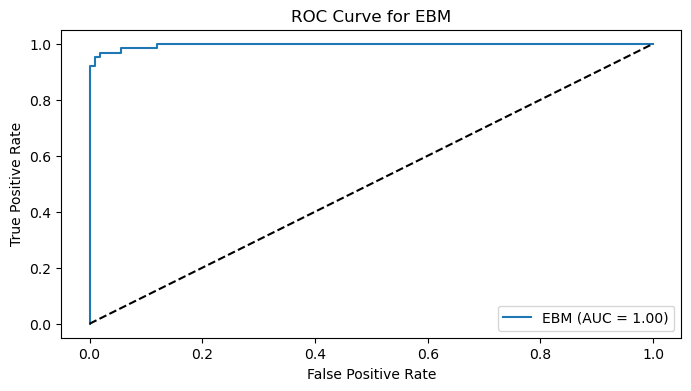

AttributeError: 'ExplainableBoostingClassifier' object has no attribute 'feature_importances_'

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    confusion_matrix,
    roc_curve
)
from interpret.glassbox import ExplainableBoostingClassifier
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Data Preprocessing
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode target variable

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the EBM model
ebm_model = ExplainableBoostingClassifier()
ebm_model.fit(X_train, y_train)

# Make predictions
y_pred = ebm_model.predict(X_test)
y_proba = ebm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Display the performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for EBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label=f'EBM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve for EBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature importance
importances = ebm_model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance for EBM')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [28]:
pip install pandas numpy matplotlib seaborn scikit-learn interpret

Note: you may need to restart the kernel to use updated packages.


                 Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Logistic Regression  0.964912  0.951613   0.967213  0.936508  0.997942
1        Decision Tree  0.923977  0.900763   0.867647  0.936508  0.926587
2                 k-NN  0.959064  0.942149   0.982759  0.904762  0.995297
3        Random Forest  0.970760  0.959350   0.983333  0.936508  0.996032
4                  SVM  0.935673  0.904348   1.000000  0.825397  0.993092
5                  EBM  0.976608  0.967742   0.983607  0.952381  0.996620


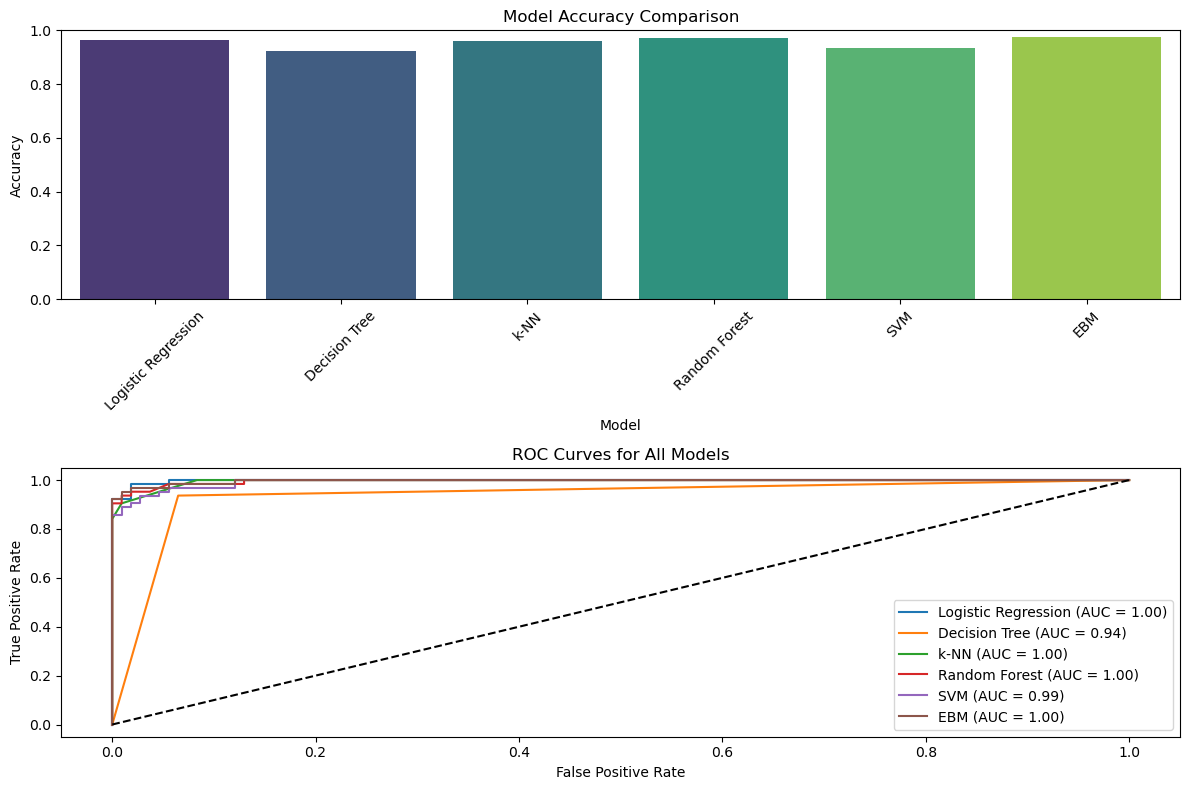

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    confusion_matrix,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from interpret.glassbox import ExplainableBoostingClassifier
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Data Preprocessing
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode target variable

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'EBM': ExplainableBoostingClassifier()
}

# Store metrics
results = []

# Train models and collect metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append metrics to results list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Plotting accuracy and ROC curve for each model
plt.figure(figsize=(12, 8))

# Accuracy Bar Plot
plt.subplot(2, 1, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# ROC Curves
plt.subplot(2, 1, 2)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

                 Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Logistic Regression  0.964912  0.951613   0.967213  0.936508  0.997942
1        Decision Tree  0.929825  0.906250   0.892308  0.920635  0.927910
2                 k-NN  0.959064  0.942149   0.982759  0.904762  0.995297
3        Random Forest  0.976608  0.967742   0.983607  0.952381  0.995958
4                  SVM  0.935673  0.904348   1.000000  0.825397  0.993092
5                  EBM  0.976608  0.967742   0.983607  0.952381  0.996620


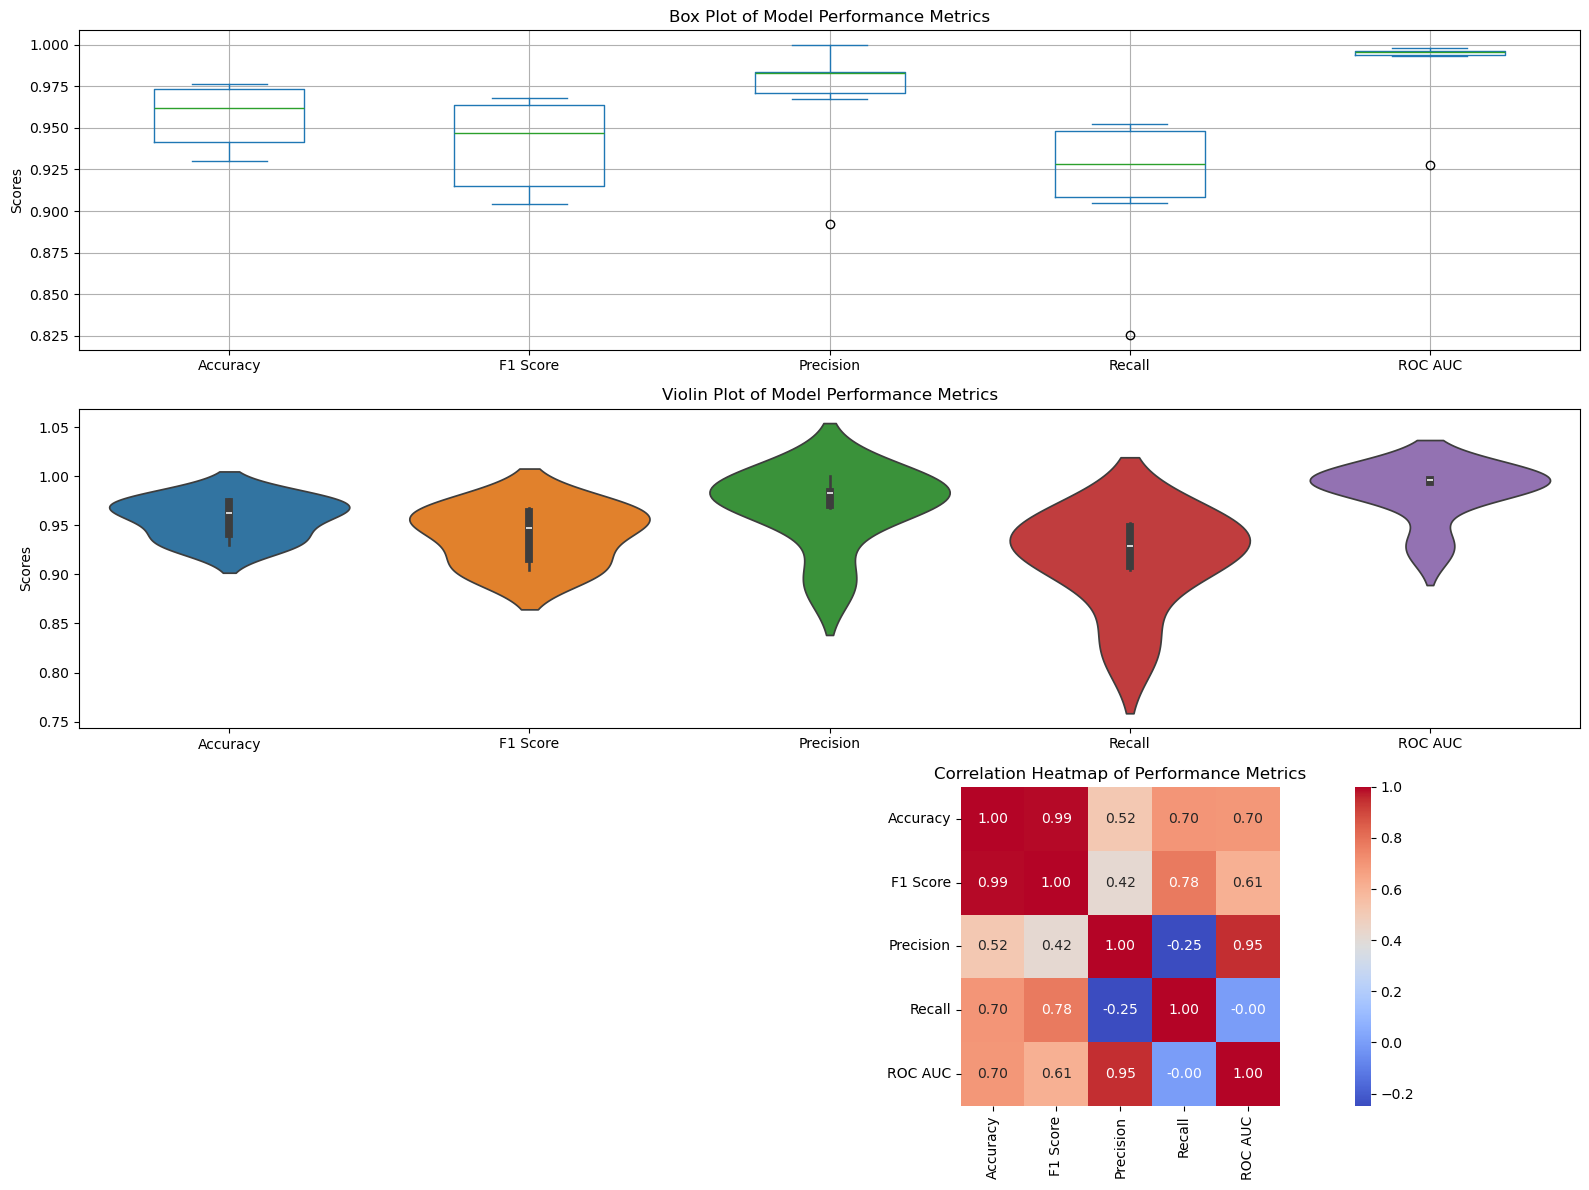

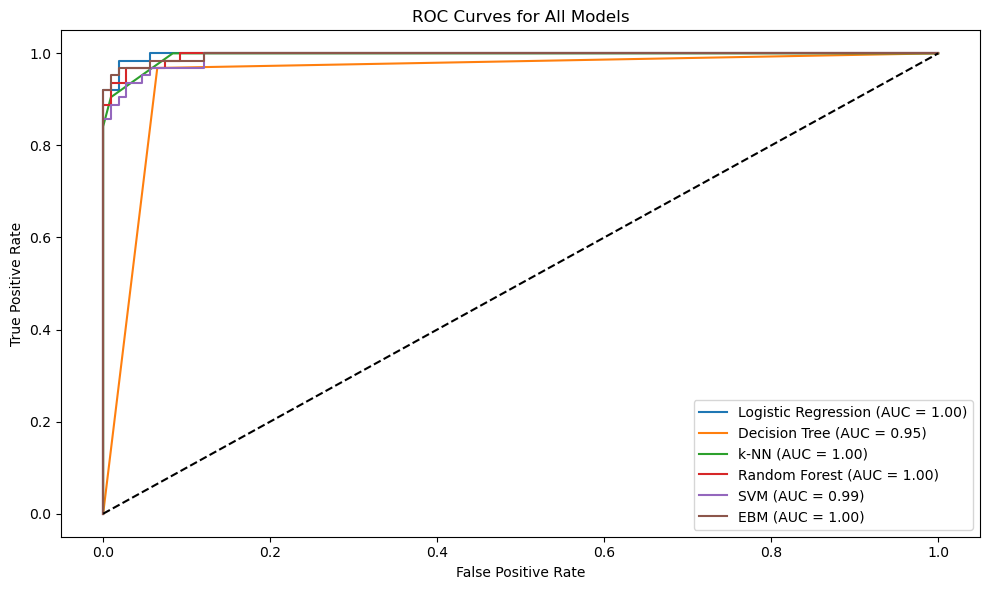

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    confusion_matrix,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from interpret.glassbox import ExplainableBoostingClassifier
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Load the dataset
url = "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv(url)

# Data Preprocessing
data = data.drop(columns=['Unnamed: 32', 'id'])  # Drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode target variable

# Separate features and target variable
X = data.drop(columns='diagnosis')
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'EBM': ExplainableBoostingClassifier()
}

# Store metrics
results = []

# Train models and collect metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Append metrics to results list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Advanced Visualizations
plt.figure(figsize=(16, 12))

# 1. Box Plot of Performance Metrics
plt.subplot(3, 1, 1)
results_df.set_index('Model')[['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']].plot(kind='box', ax=plt.gca())
plt.title('Box Plot of Model Performance Metrics')
plt.ylabel('Scores')
plt.grid(True)

# 2. Violin Plot of Performance Metrics
plt.subplot(3, 1, 2)
sns.violinplot(data=results_df[['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']])
plt.title('Violin Plot of Model Performance Metrics')
plt.ylabel('Scores')
plt.xticks(ticks=range(len(results_df.columns[1:])), labels=results_df.columns[1:])

# 3. Correlation Heatmap
plt.subplot(3, 1, 3)
correlation_matrix = results_df[['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Performance Metrics')

plt.tight_layout()
plt.show()

# Plotting ROC curves for each model
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()